<a href="https://colab.research.google.com/github/GODHYEONJU/MS-AI-School-/blob/main/4_30_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR) #Description속성 이용해서 데이터셋 정보 확인

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names 

In [8]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
data.shape

(442, 10)

In [11]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression() 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size = 0.2, random_state=2023
)

In [16]:
#혈당 수치
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train) #'s6'항목의 데이터 타입이 y_train데이터 타입과 같지 않으니, 맞춰준다.

LinearRegression()

In [17]:
y_pred = sim_lr.predict(X_test['s6'].values.reshape(-1,1))

In [18]:
from sklearn.metrics import r2_score #r2_score함수를 사용해 선형 회귀 모델의 결정계수 값 계산
print('단순 결정 트리 회귀 R2: {:.2f}'.format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀 R2: 0.16


In [20]:
#liner line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']),10)
line_y = sim_lr.predict(line_x.reshape((-1,1)))

print(line_x)
print(line_y)

[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[ 76.63014404  93.91143293 111.19272182 128.4740107  145.75529959
 163.03658848 180.31787736 197.59916625 214.88045514 232.16174402]


단순 선형 회귀 계수(w) : 586.70, 절편(b):152.60


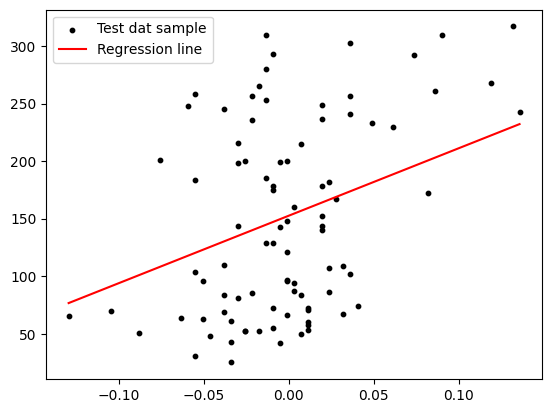

In [24]:
#Test data 표현
plt.scatter(X_test['s6'], y_test, s=10, c='black') #단순은 s6만 비교분석석
plt.plot(line_x,line_y, c='red')
plt.legend(['Test dat sample', 'Regression line'])
print('단순 선형 회귀 계수(w) : {:.2f}, 절편(b):{:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

In [25]:
#multiple linear regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

In [26]:
print('다중 선형 회귀, R2:{:.2f}'.format(r2_score(y_test, y_pred))) #다중은 x전체 비교교

다중 선형 회귀, R2:0.50


In [36]:
#Decision Tree Regressior
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [37]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

In [38]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [39]:
print('단순 결정 트리 회귀 R2:{:.2f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2:0.14


In [42]:
#liner line생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']),10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))

print(line_x)
print(line_y)

[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[118.41176471 118.41176471 118.41176471 125.75       118.63636364
 150.42857143 197.57692308 202.66666667 202.66666667 263.        ]


<ipython-input-43-f0a402099d8b>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('[Test data sample', 'Regression line')


단순 선형회귀 계수(w) : 586.70, 절편(b): 152.60


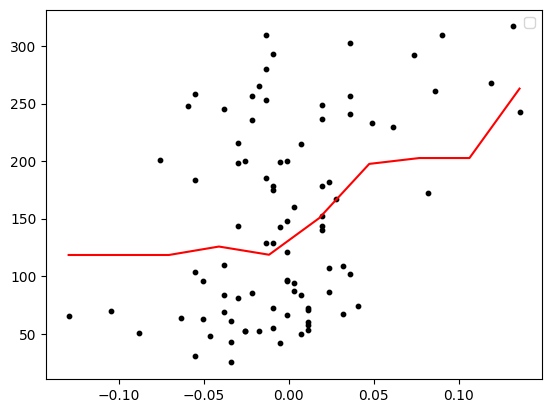

In [43]:
#test data
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend('[Test data sample', 'Regression line')
print('단순 선형회귀 계수(w) : {:.2f}, 절편(b): {:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

In [45]:
#multi
mul_regr = DecisionTreeRegressor(max_depth=5)
mul_regr.fit(X_train, y_train)
y_pred = mul_regr.predict(X_test)
print('다중 결정 트리 회귀 R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 회귀 R2: 0.28


In [49]:
#Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)),y_train)
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print('단순 서포트 벡터 머신 회귀 R2:{:.2f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2:0.06


In [51]:
for i in range(1,20):
  svm_regre = SVR(C=i)
  svm_regre.fit(X_train,y_train)
  y_pred = svm_regre.predict(X_test)
  print("다중 서포트 백터 머신 회귀, i ={} R2 : {:.2f}".format(i, r2_score(y_test, y_pred)))

다중 서포트 백터 머신 회귀, i =1 R2 : 0.17
다중 서포트 백터 머신 회귀, i =2 R2 : 0.29
다중 서포트 백터 머신 회귀, i =3 R2 : 0.35
다중 서포트 백터 머신 회귀, i =4 R2 : 0.39
다중 서포트 백터 머신 회귀, i =5 R2 : 0.42
다중 서포트 백터 머신 회귀, i =6 R2 : 0.44
다중 서포트 백터 머신 회귀, i =7 R2 : 0.46
다중 서포트 백터 머신 회귀, i =8 R2 : 0.47
다중 서포트 백터 머신 회귀, i =9 R2 : 0.48
다중 서포트 백터 머신 회귀, i =10 R2 : 0.49
다중 서포트 백터 머신 회귀, i =11 R2 : 0.49
다중 서포트 백터 머신 회귀, i =12 R2 : 0.50
다중 서포트 백터 머신 회귀, i =13 R2 : 0.50
다중 서포트 백터 머신 회귀, i =14 R2 : 0.50
다중 서포트 백터 머신 회귀, i =15 R2 : 0.50
다중 서포트 백터 머신 회귀, i =16 R2 : 0.50
다중 서포트 백터 머신 회귀, i =17 R2 : 0.50
다중 서포트 백터 머신 회귀, i =18 R2 : 0.50
다중 서포트 백터 머신 회귀, i =19 R2 : 0.50


In [54]:
#multi layer perceptron regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=4000)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('다중 MLP 회귀 R2:{:.2f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀 R2:0.47


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
